---
title: Homework 4
jupyter: python3
---


This assignment will continue to use the American Community Survey (ACS) from the US Census.
You will need to refer to the documentation to know what the ACS variable names mean. You can find a copy of the codebook in the [Lab 4 folder on Google Drive](https://drive.google.com/drive/u/0/folders/1jkY0mTxBhwOvvCJE_CJ3LWiOr_9V1ojZ)


In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
acs = pd.read_csv("./pums_short.csv.gz")

## Question 1: Working with missing data

### Q1.a

In the previous lab we counted the number of missing values for the `"RNTP"` column using

In [10]:
print(acs["RNTP"].isna().sum())

202728


In [9]:
print(acs["VALP"].isna().sum())  
print(f"total number of rows in the acs table: {len(acs)}") 


97644
total number of rows in the acs table: 276632


In [5]:
print(len(acs))
#Out of the 276,632 total rows, there are 97,644 missing values in the VALP column 

276632


Repeat for the `"VALP"` column. (If you want, you can compute both totals simultaneously.)

Print out the total number of rows in the `acs` table. What do you notice about the total number of rows and the sum of the missing values for these two columns?



### Q1.b

Write a single line of code that proves that 100% of observations are missing either the `"VALP"` or `"RNTP"` measurements.


In [12]:
print((acs["VALP"].isna() | acs["RNTP"].isna()).mean() == 1.0)

True




### Q1.c

The `.dropna()` method has a `subset = ['column1', 'column2']` argument that allows you to indicate which columns your want to use to control how rows are dropped from the result.

Create a table called `owners` that only includes households that have non-missing `"VALP"` entries. Print out the number of rows in this table and verify it matches the number of observations with *non-missing* `"VALP"` entries in `acs`. Hint:

In [26]:
hint = pd.Series([True, False, False, True])
~ hint
owners = acs.dropna(subset=['VALP'])
print(len(owners))

if len(owners) == acs["VALP"].notna().sum():
    print("The number of rows in the acs table is the same as the number of rows in the owners table")
else:
    print("The number of rows in the acs table is not the same as the number of rows in the owners table")


178988
The number of rows in the acs table is the same as the number of rows in the owners table


### Q1.d

Using the `owners` table, what **proportion** of rows are missing `"HINCP"` values?

Find the median value of the non-missing values (hint: built in Panadas methods automatically drop missing values).

Using the `.fillna(VALUE, inplace = TRUE)` method, update the `"HINCP"` column of the `owners` table by making any missing values equal to median of the non-missing values.

Verify by showing that all of the values are not missing for `"HINCP"`.




In [27]:
missing_hincp_proportion = owners["HINCP"].isna().mean()
print(missing_hincp_proportion)
median_hincp = owners["HINCP"].median()
print(median_hincp)
owners["HINCP"].fillna(median_hincp, inplace=True)
print(owners["HINCP"].isna().sum() == 0)

0.01331932867007844
75000.0
True



### Q1.e

Repeat the above steps to create a table `renters` that contains only rows for people who are renting (have non-missing `RNTP` values) and median impute any missing `HINCP` values.

For both `owners` and `renters` compute the following quantities for the "HINCP" column.
- mean
- median
- IQR
- standard deviation

Which group has the higher location values? Which group has more spread? Comment briefly on what this means.



Owners have higher location values and is more spread. This means that there is more deviation in the data set about home owners.

In [37]:
renters["HINCP"].fillna(median_hincp, inplace=True)
print(renters["HINCP"].isna().sum() == 0)

def compute_summary_stats(df, column):
    mean = df[column].mean()
    median = df[column].median()
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    std = df[column].std()
    return mean, median, iqr, std

owners_mean_hincp, owners_median_hincp, owners_iqr_hincp, owners_std_hincp = compute_summary_stats(owners, "HINCP")
renters_mean_hincp, renters_median_hincp, renters_iqr_hincp, renters_std_hincp = compute_summary_stats(renters, "HINCP")

print(f"Owners - Mean: {owners_mean_hincp}, Median: {owners_median_hincp}, IQR: {owners_iqr_hincp}, Std: {owners_std_hincp}")
print(f"Renters - Mean: {renters_mean_hincp}, Median: {renters_median_hincp}, IQR: {renters_iqr_hincp}, Std: {renters_std_hincp}")


True
Owners - Mean: 103101.59041946946, Median: 75000.0, IQR: 85100.0, Std: 107811.39422510703
Renters - Mean: 56607.35456808833, Median: 40000.0, IQR: 49600.0, Std: 64594.46491847602




## Question 2: More on distributions

### Q2.a Distributions of number of people in the household

Create a histogram of the number of people in the household (`NP`) for the `acs` data. Use the `bins` argument to create a histogram with 20 bins. Briefly discuss the location, spread, and skew of the distribution.


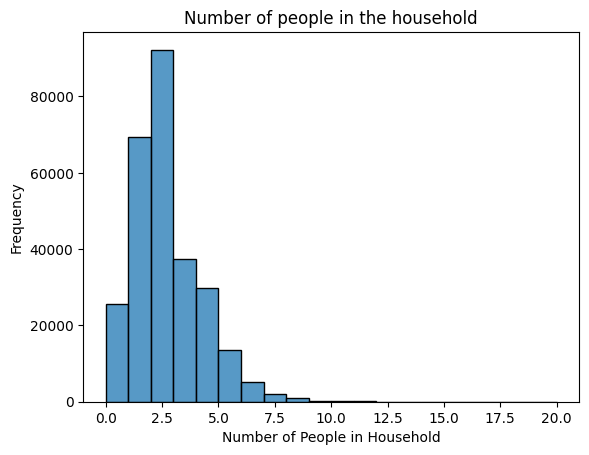

In [36]:
sb.histplot(acs['NP'], bins=20)
plt.title('Number of people in the household')
plt.xlabel('Number of People in Household')
plt.ylabel('Frequency')
plt.show()
#The histogram is not very widely spead out, most of the data is concentrated between 1 and 5 people in the household
#The histogram is slightly right-skewed
#the central tendency of the data is around 2-3 people



### Q2.b Summaries of `NP`

Check your answers to the previous question by computing the mean, median, IQR, standard deviation, quantile skewness using the 0.25 and 0.75 quantile, and the coefficient of skewness of the `NP` column.


In [39]:
print (acs['NP'].mean())
print (acs['NP'].median())
print (acs['NP'].quantile(0.75) - acs['NP'].quantile(0.25))
print (acs['NP'].std())
print ((acs['NP'].quantile(0.75)+acs["NP"].quantile(0.25)-2* acs["NP"].median())/(acs["NP"].quantile(0.75)-acs["NP"].quantile(0.25)))
print (3*(acs['NP'].mean()-acs['NP'].media

2.208764712686891
2.0
2.0
1.5263892280571307
0.0
0.4103109000958116




### Q2.c Comparing conditional distribution of NP for owners and renters

Create a side-by-side boxplot of the number of people in the household for owners and renters. What do you notice about the distributions of the number of people in the household for owners and renters?


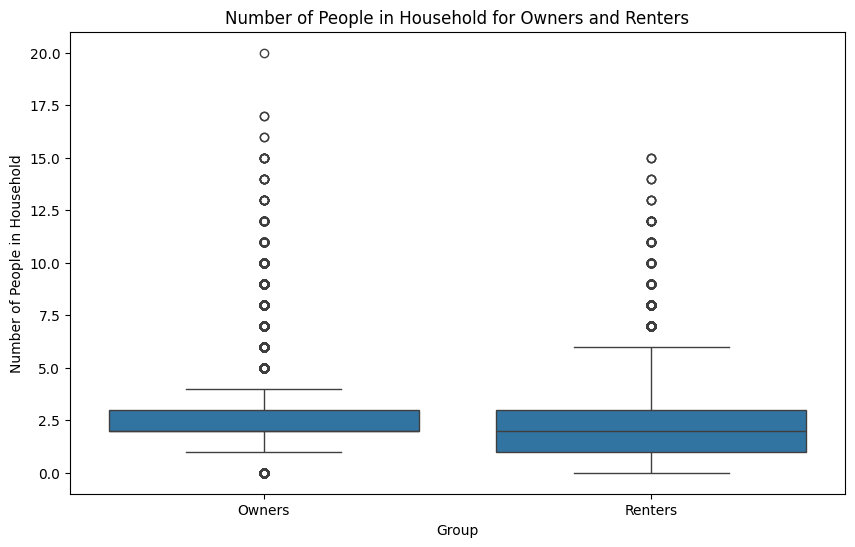

In [40]:
owners['Group'] = 'Owners'
renters['Group'] = 'Renters'

combined = pd.concat([owners, renters])

plt.figure(figsize=(10, 6))
sb.boxplot(x='Group', y='NP', data=combined)
plt.title('Number of People in Household for Owners and Renters')
plt.xlabel('Group')
plt.ylabel('Number of People in Household')
plt.show()

#The distribution for owners is more spread than the distribution for renters, however the middle 50% of the data is more spread out for renters than for owners.


### Q2.d Effect size of the difference in means

Compute the effect size of the difference in means of the number of people in the household for owners and renters. Use the formula for Cohen's $d$

$$d = \frac{\bar X_1 - \bar X_2}{S_p}$$

where $\bar X_1$ and $\bar X_2$ are the means of the two groups and $S_p$ is the pooled standard deviation.

Using the following table of effect sizes, how would you interpret the effect size of the difference in means of the number of people in the household for owners and renters?

| Effect size | Interpretation |
|-------------|-----------------|
| (0, 0.2]    | Small           |
| (0.2, 0.5]  | Medium          |
| (0.5, 0.1]  | Large           |
| (1, 2]      | Very large      |





## Question 3: More on means and medians

For this problem, we will investigate some theoretical properties of means and medians.

### Q3.a

We have already seen that the mean is the unique point $\bar X$ that makes $\sum_{i=1}^n (X_i - \bar X) = 0$. While we didn't introduce it as such, it is also the case that $\bar X$ is the point that **minimizes** $\sum_{i=1}^n (X_i - \bar X)^2$, the sum of squared deviations.

Using the `HINCP` column of the `acs` data, demonstrate that the sum of squared deviations from the mean is less than the sum of squared deviations from the median ($\sum_{i=1}^n (X_i - \tilde X)^2$).

Recall that `x**2` is how we square things in Python.

### Q3.b

Now, using $\bar X$ and $\tilde X$, compute the **sum of absolute distances**, $\sum_{i=1}^n | X_i - \bar X |$ and $\sum_{i=1}^n |X_i - \tilde X|$. Recall the `.abs()` method can compute the absolute value of a series.

### Q3.c

While we are not rising to the level of a mathematical proof, what do these result suggest about which type of measure of location would minimize the sum of absolute differences?
